## 1. 통계량과 탐색

0. 데이터 읽기

In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns

data = pd.read_csv("creditset2.csv")
data.describe()

income          age          loan  default10yr
count   2000.000000  2000.000000   2000.000000  2000.000000
mean   45331.600018    40.927143   4444.369695     0.141500
std    14326.327119    13.262450   3045.410024     0.348624
min    20014.489470    18.055189      1.377630     0.000000
25%    32796.459720    29.062492   1939.708847     0.000000
50%    45789.117310    41.382673   3974.719418     0.000000
75%    57791.281670    52.596993   6432.410625     0.000000
max    69995.685580    63.971796  13766.051240     1.000000

1. 공분산

In [5]:
import numpy as np
import scipy as sp

A=data.age
B=data.income

print(sp.cov(A,B))   #공분산

[[ 1.75892573e+02 -6.64700713e+03]
 [-6.64700713e+03  2.05243649e+08]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.cov is deprecated and will be removed in SciPy 2.0.0, use numpy.cov instead
  import sys


2. 상관관계

In [6]:
import numpy as np
from scipy import stats

A=data.age
B=data.income
C=data.loan

print(stats.pearsonr(A,B))   #상관관계
print(stats.pearsonr(A,C))   #상관관계


(-0.03498384417456003, 0.1178115340192192)
(0.006561002944344477, 0.7693412420940746)


3. Paired T-test

In [7]:
from scipy import stats 
before_ad = [100, 110, 105, 115, 100, 90]
after_ad = [140, 130, 115, 125, 110, 110]

tTestResult= stats.ttest_rel(before_ad, after_ad)
print(tTestResult)

Ttest_relResult(statistic=-3.8413666267326794, pvalue=0.012106854691433334)


4. seaborn 활용 탐색

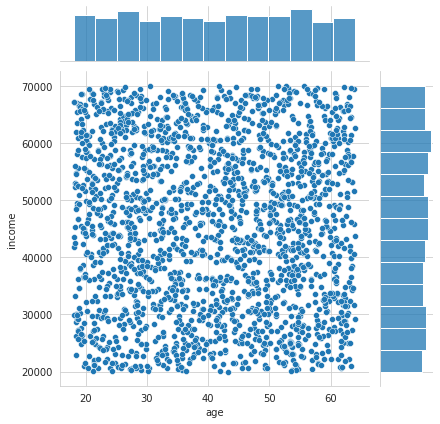

In [8]:
#seaborn 활용 시각화 연습
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame( {"x":[1,2,3,1,1], "y":[3,2,1,2,1]})
join1 = sns.jointplot(x="age", y="income", data=data);
join1.savefig("join1.png")


In [9]:
#tips 예제 데이터로 연습
plt.clf()

tips = sns.load_dataset('tips')
sns.set_style("whitegrid")
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<Figure size 432x288 with 0 Axes>

tips 데이터에서, time별로 total_bill의 박스플랏을 그려보세요. 각 boxplot은 성별로 나눠서 표현해보세요.(hue를 지정)

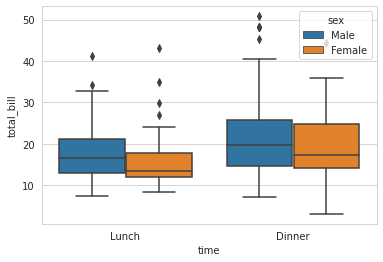

In [10]:
#box plot
#sns.boxplot(x="sex", y="total_bill", data=tips)
#plt.show()

#box plot
sns.boxplot(x="time", y="total_bill", hue="sex", data=tips)
plt.show()

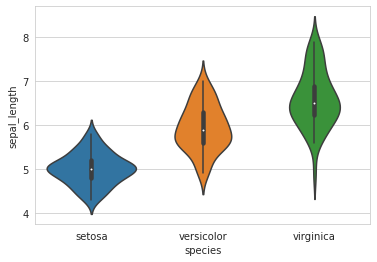

In [11]:


#violin plot
iris = sns.load_dataset("iris")    
sns.violinplot(x=iris.species, y=iris.sepal_length, data=iris);
plt.savefig("violin.png")

In [19]:
df1 = pd.DataFrame( {'x':['A','B', 'C', 'D', 'E', 'F'], 'y':[2021,2021,2021,2022,2022,2022], 'z':[1,2,3,4,5,6]})

df1.pivot(index='x',columns='y', values='z').fillna(0) #index 중복 없어야 함.

y  2021  2022
x            
A   1.0   0.0
B   2.0   0.0
C   3.0   0.0
D   0.0   4.0
E   0.0   5.0
F   0.0   6.0

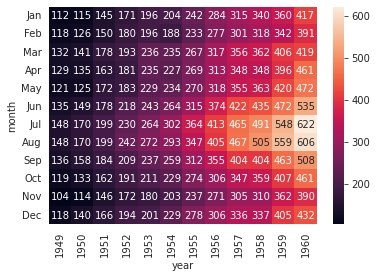

In [ ]:
#다른 예제 데이터
flights = sns.load_dataset("flights")
flights.head()

df = flights.pivot('month', 'year', 'passengers')
df.head()


#heatmap
sns.heatmap( df , annot=True, fmt="d")	#fmt='d' 정수형태로 수치 입력
plt.show()


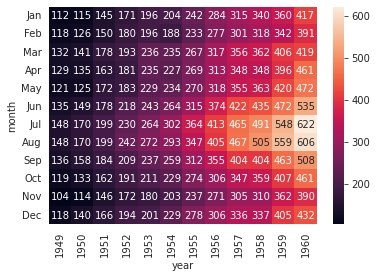

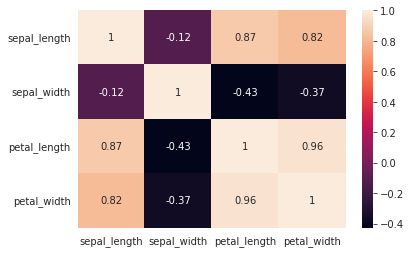

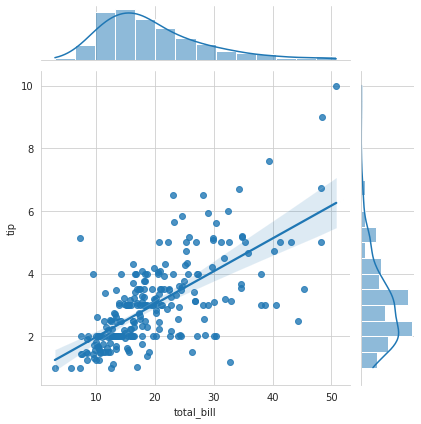

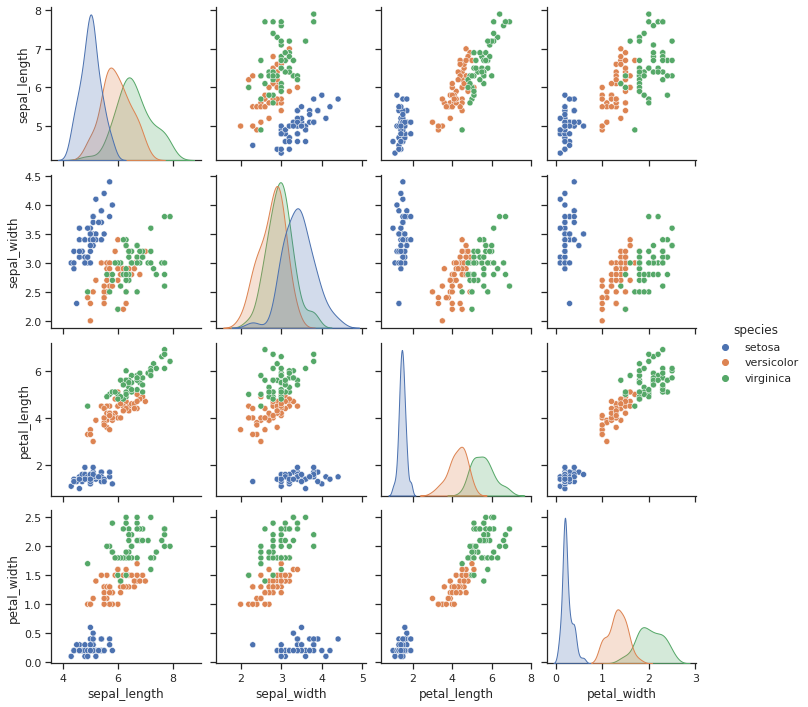

In [ ]:

#heatmap+pandas
df.style.background_gradient(cmap='summer')

#heatmap+corr
corr=iris.corr()
corr
sns.heatmap(corr, annot=True)

#jointplot
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");
plt.savefig('join3.png')


#pair plot
sns.set(style="ticks")
iris = sns.load_dataset("iris")
iris.head(10)

sns.pairplot(iris, hue="species")
plt.show()

In [ ]:
#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips, size=7)
plt.show()

#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips, hue="smoker", size=7)
plt.show()

#lm plot
sns.set_style("darkgrid")
sns.lmplot( x="total_bill", y="tip", data=tips, hue="time", size=7)
plt.show()

#logistic regression 결과, binary 표시(20%기준)
tips['big_tip'] = tips['tip']/tips['total_bill'] >= 0.2
sns.lmplot(x="total_bill", y="big_tip", data=tips,logistic=True, y_jitter=.03);
plt.savefig("tiplogit.png")

#-----------------------------------------------------------#
#line plot
fmri = sns.load_dataset("fmri")
fmri.head()

sns.lineplot(x="timepoint", y="signal", data=fmri)
sns.lineplot(x="timepoint", y="signal", hue="event", style="event", markers=True, data=fmri)



##2. 데이터 전처리 기본 리뷰

1. Imputing
- Source: credit approval dataset(crx data): http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/


In [ ]:
#Complete case analysis: missing value가 하나라도 있는 행은 제거 / Missing이 적은 경우에 사용
import pandas as pd
data = pd.read_csv('creditApprovalUCI.csv')
data.shape
data.isnull().mean().sort_values(ascending=True)
#data의 컬럼별로 missing을 체크해서, 컬럼별로 평균 / True, False / 각 컬럼별로 missing value의 비율, 정렬도 시킴
data_cca = data.dropna()#how='any', 하나라도 missing이 있는 행 제거
data_cca.isnull().mean()

In [ ]:
print(data.shape)
print(data_cca.shape)

(690, 16)
(564, 16)


In [ ]:
#또는 특정 변수에 대해서도 사용할 수 있음!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
data.dropna(subset=['A3', 'A4'])  #좋은방법!

#모든 변수에서 missing이어야 해당 행 제거
data.dropna(how='all')

A1     A2      A3 A4 A5  A6  A7    A8   A9  A10  A11 A12 A13    A14  A15  \
0    b  30.83   0.000  u  g   w   v  1.25    t    t    1   f   g  202.0    0   
1    a  58.67   4.460  u  g   q   h  3.04    t    t    6   f   g   43.0  560   
2    a  24.50     NaN  u  g   q   h   NaN  NaN  NaN    0   f   g  280.0  824   
3    b  27.83   1.540  u  g   w   v  3.75    t    t    5   t   g  100.0    3   
4    b  20.17   5.625  u  g   w   v  1.71    t    f    0   f   s  120.0    0   
..  ..    ...     ... .. ..  ..  ..   ...  ...  ...  ...  ..  ..    ...  ...   
685  b  21.08  10.085  y  p   e   h  1.25    f    f    0   f   g  260.0    0   
686  a  22.67   0.750  u  g   c   v  2.00    f    t    2   t   g  200.0  394   
687  a  25.25  13.500  y  p  ff  ff  2.00    f    t    1   t   g  200.0    1   
688  b  17.92   0.205  u  g  aa   v  0.04    f    f    0   f   g  280.0  750   
689  b  35.00   3.375  u  g   c   h  8.29    f    f    0   t   g    0.0    0   

     A16  
0      1  
1      1  
2      1  
3      1  
4      1  
..   ...  
685    0  
686    0  
687    0  
688    0  
689    0  

[690 rows x 16 columns]

- Mean or Median Imputation

In [ ]:
#missing을 평균이나 중앙값 대체(numerical 변수에 적용), 
#주로 train에서의 평균/중앙값을 계산 후 test나 이후의 경우에 사용
#정규분포인 경우에만 적용, 그 외에는 데이터를 왜곡
import pandas as pd
from sklearn.impute import SimpleImputer

data = pd.read_csv('creditApprovalUCI.csv')
print(data.isnull().mean())

A1     0.017391
A2     0.017391
A3     0.133333
A4     0.008696
A5     0.008696
A6     0.013043
A7     0.013043
A8     0.133333
A9     0.133333
A10    0.133333
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.018841
A15    0.000000
A16    0.000000
dtype: float64


- creditApprovalUCI.csv 파일을 읽으셔서, 1~100행의 2번 및 3번 컬럼만 사용하셔서
- mean으로 imputing 해보세요.


In [ ]:
#sklearn으로 imputing-이 방법을 사용!
data = pd.read_csv('creditApprovalUCI.csv')

data_num = data.iloc[ 0:100, 1:3 ]
data_num

In [ ]:
#수치형 변수로만 구성된 데이터프레임 만들기
#data_num = data[['A2', 'A3', 'A8', 'A11', 'A15']]
print(data_num.isnull().mean())

#데이터프레임의 컬럼 선택하는 방법
# 데이터프레임['컬럼이름']
# 데이터프레임[ ['컬럼이름1', '컬럼이름2', '컬럼이름3' ]]

imputer = SimpleImputer(strategy='mean')  #또는 mean
imputer.fit(data_num) #median값을 찾아주기만 함
print(imputer.statistics_)
data_num = imputer.transform(data_num)  #np.array가 결과이므로 필요 시 다시 dataframe 변환
data_num_df = pd.DataFrame(data_num)
print(data_num_df.isnull().mean())

A2    0.04
A3    0.11
dtype: float64
[34.19041667  4.60797753]
0    0.0
1    0.0
dtype: float64


In [ ]:
#imputing mode or frequent category
import pandas as pd
from sklearn.impute import SimpleImputer

data = pd.read_csv('creditApprovalUCI.csv')

data_cat = data[['A4', 'A5', 'A6', 'A7']]
print(data_cat.isnull().mean())

A4    0.008696
A5    0.008696
A6    0.013043
A7    0.013043
dtype: float64


In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
#가장 빈번하게 발생하는 범주로 missing을 대체
#imputer.fit(data_cat)
#imputer.statistics_
#data_cat = imputer.transform(data_cat)

#아래처럼 한 번에 수행해도 됨
data_cat = imputer.fit_transform(data_cat)

data_cat_df = pd.DataFrame( data_cat )
print(data_cat_df.isnull().mean())

0    0.0
1    0.0
2    0.0
3    0.0
dtype: float64


2. Partitioning

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
train, test = train_test_split(data, test_size=0.3)

#컬럼 삭제: .drop 메소드, axis=1로 지정, labels에 컬럼 이름 지정
data.drop(labels=['A16'], axis=1) #단, 원본 데이터프레임인 data에는 반영안되고, A16컬럼이 제거된 새로운 데이터프레임이 출력됨.
print(data['A16'])

#data.drop(labels=['A16'], axis=1, inplace=True) #inplace=True를 지정하면 원본 데이터프레임인 data에 반영됨
#print(data['A16'])

0      1
1      1
2      1
3      1
4      1
      ..
685    0
686    0
687    0
688    0
689    0
Name: A16, Length: 690, dtype: int64


In [ ]:
X = data.drop(labels=['A16'], axis=1)#data에서 A16변수만 지우고...
y = data['A16']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)

3. Imputing+Partitionig+Scaling

In [ ]:
#standard scaling
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('creditApprovalUCI.csv')
data_num = data[['A2', 'A3', 'A8', 'A11', 'A15']] #수치형 변수로 구성된 data_num
columns_name = data_num.columns

imputer = SimpleImputer(strategy='median')
data_num = imputer.fit_transform(data_num) 
data_num.shape
data_num_df = pd.DataFrame(data_num, columns = columns_name)
data_num_df

In [ ]:
X_train, X_test = train_test_split( data_num_df, test_size=0.3)
print(X_train.shape, X_test.shape)

(483, 5) (207, 5)


In [ ]:
scaler = StandardScaler()

#X_train만 스케일링할 경우
X_train_scaled = scaler.fit_transform(X_train)

#X_train의 평균, 표준편차로 다른 데이터프레임도 스케일링 할 경우
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) #다만, 변환 후에는 numpy array
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [ ]:
#minmax scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1]:
#modeling





##3. 데이터 전처리 심화

-apply 함수 활용 missing value 처리

In [ ]:
import numpy as np
import pandas as pd

def get_first_cabin(row):
	try:
		return row.split()[0]
	except:
		return np.nan
	
data = pd.read_csv("titanic_raw.csv")
data = data.replace('?', np.nan)
data['cabin'] = data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv', index=False)


titanic.csv read-> column->missing percentage

numeric variable->
mean imputing
train, test split(test=0.3)
minmax scaling



In [ ]:
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("titanic.csv")
df_num = df[ ['age', 'sibsp']]
df_num.isnull().mean()
imputer = SimpleImputer(strategy='mean')
df_num = pd.DataFrame( imputer.fit_transform(df_num), columns = [['age', 'sibsp']] )
train, test = train_test_split( df_num, test_size=0.3)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform( train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


- 탐색

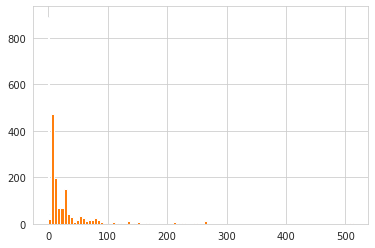

In [ ]:
#탐색적 자료 분석
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data.columns
data.dtypes
data['sibsp'].unique()
data['fare'].unique()[0:20]

#embarked, cabin에 대해서도 확인해보기
data['embarked'].unique()
#data.describe()
#Histogram
data['sibsp'].hist(bins=20)
data['fare'].hist(bins=50)

In [ ]:
#modleing




- 다른 데이터로 확인!
 - 데이터 다운로드 및 압축 해제

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup98-mld/epsilon_mirror/cup98lrn.zip
!unzip cup98lrn.zip

--2022-06-10 06:02:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/kddcup98-mld/epsilon_mirror/cup98lrn.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36468735 (35M) [application/x-httpd-php]
Saving to: ‘cup98lrn.zip’

cup98lrn.zip        100%[===================>]  34.78M  28.5MB/s    in 1.2s    

2022-06-10 06:02:35 (28.5 MB/s) - ‘cup98lrn.zip’ saved [36468735/36468735]

Archive:  cup98lrn.zip
  inflating: cup98LRN.txt            


In [ ]:
#missing data 확인
import pandas as pd
import matplotlib.pyplot as plt
cols = ['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT',
'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE']
data = pd.read_csv('cup98LRN.txt', usecols=cols)
data.head()


AGE  NUMCHLD  INCOME  WEALTH1  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  \
0  60.0      NaN     NaN      NaN      NaN       NaN      NaN       NaN   
1  46.0      1.0     6.0      9.0      0.0       0.0      3.0       1.0   
2   NaN      NaN     3.0      1.0      0.0       0.0      1.0       0.0   
3  70.0      NaN     1.0      4.0      0.0       0.0      0.0       0.0   
4  78.0      1.0     3.0      2.0      1.0       0.0      9.0       0.0   

   MAGFAML  MAGFEM  MAGMALE  
0      NaN     NaN      NaN  
1      1.0     1.0      0.0  
2      0.0     0.0      0.0  
3      0.0     0.0      0.0  
4      4.0     1.0      0.0

In [ ]:
data.describe()
#data.isnull().sum()	#변수별 missing value의 수
data.isnull().mean() 	#변수별 missing value 비율


AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

Text(0.5, 1.0, 'Quantifying missing data')

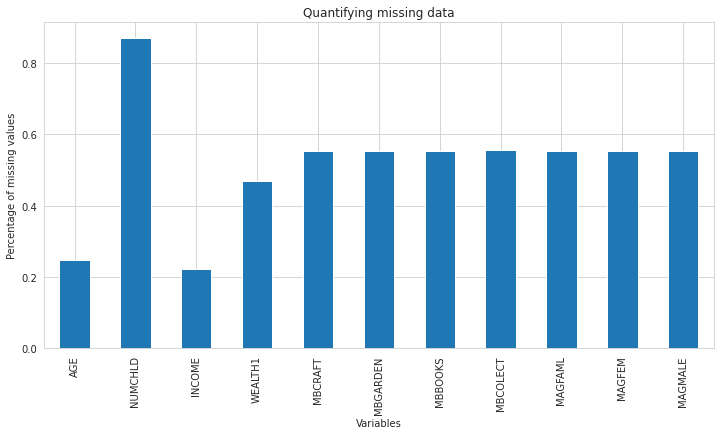

In [ ]:
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')


In [ ]:
#범주형 변수의 cardinality(범주의 수)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cols = ['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15']
data = pd.read_csv('cup98LRN.txt', usecols=cols)
data = data.replace(' ', np.nan)		#비어있는 문자열을 NaN으로 치환
data.head()
data.nunique() 
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

Text(0.5, 1.0, 'Cardinality')

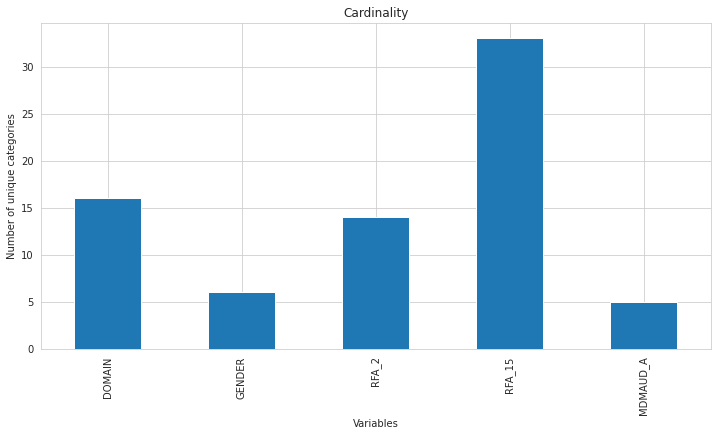

In [ ]:
data.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

In [ ]:
#numerical 변수의 distinct value의 개수
data[['RFA_2', 'MDMAUD_A', 'GENDER']].nunique()

#GENDER 변수의 범주별 빈도를 측정해보세요~
data['GENDER'].value_counts()

F    51277
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [ ]:
#소수의 범주 발견
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('car.data', header=None)
data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.head()
data['class'].unique()
label_freq = data['class'].value_counts() / len(data)
print(label_freq)


unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


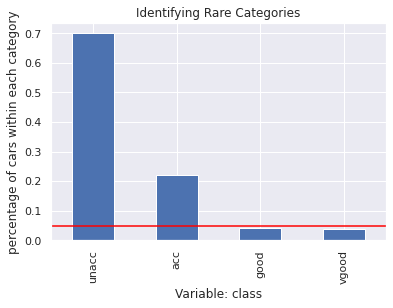

In [ ]:
data['class'].unique()
label_freq = data['class'].value_counts() / len(data)
print(label_freq)

fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of cars within each category')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying Rare Categories')
plt.show()

- Variable distribution 확인하기

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [ ]:
boston_dataset

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

In [ ]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Text(0.5, 1.0, 'Boxplot')

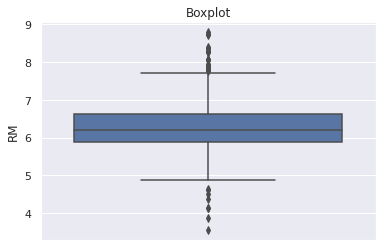

In [ ]:
#Box plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)[['RM', 'LSTAT', 'CRIM']]

sns.boxplot(y=boston['RM'])
plt.title('Boxplot')


In [ ]:
#outlier 제거하기
#boxplot의 IQR(Q3-Q1)의 1.5배를 넘는 값들을 제거
def find_boundaries(df, variable, distance):
	IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
	lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
	upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
	return upper_boundary, lower_boundary

upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [ ]:
outliers = np.where(boston['RM'] > upper_boundary, True,
np.where(boston['RM'] < lower_boundary, True, False))
~outliers

In [ ]:
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

#outlier 실제로 제거해보기
boston.loc[~outliers, 'RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 476, dtype: float64

- Category Encoding

In [ ]:
!pip install feature-engine
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 59.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 


 - Credit 데이터로 연습을 위한 데이터 읽고 생성하기

In [ ]:
import random
import pandas as pd
import numpy as np

data = pd.read_csv('crx.data', header=None)
varnames = ['A'+str(s) for s in range(1,17)]
data.columns = varnames
data = data.replace('?', np.nan)

#re-cast to float
data['A2'] = data['A2'].astype('float')
data['A14'] = data['A14'].astype('float')

#recode target as binary
data['A16'] = data['A16'].map({'+':1, '-':0})

cat_cols = [c for c in data.columns if data[c].dtypes=='O']	#범주형 변수
num_cols = [c for c in data.columns if data[c].dtypes!='O']	#수치형 변수

#missing 처리
data[num_cols] = data[num_cols].fillna(0)
data[cat_cols] = data[cat_cols].fillna('Missing')

data.to_csv('creditApprovalUCI.csv', index=False)

- One Hot Encoding
 - onehot encoding 
 - 예: 성별->각 범주가 컬럼이 되고, 값은 1또는 0 또는 한 변수에서 값이 1과 0
 - 범주 수(k)-1개의 변수로 표현
 - 경우에 따라 범주 개수 만큼의 변수로 인코딩할 수 있음: 
 - DT와 같이 재귀적이고 분할하여 모델링하는 경우, 각 범주가 분리되는 것이 효과적

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv('creditApprovalUCI.csv')

X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'], test_size=0.3,random_state=0)
X_train['A4'].unique()
X_train['A4'].isnull().mean()
X_train['A4'].value_counts()
pd.get_dummies( X_train['A4'], drop_first=True)

u  y
596  1  0
303  1  0
204  0  1
351  0  1
118  1  0
..  .. ..
359  1  0
192  1  0
629  1  0
559  1  0
684  1  0

[483 rows x 2 columns]

In [ ]:

pd.get_dummies(X_train['A4'], drop_first=True)
tmp = pd.get_dummies(X_train['A4'], drop_first=True)	#k-1개로 인코딩
tmp.head()

In [ ]:
pd.get_dummies(X_train['A4'], drop_first=True, dummy_na=True)

u  y  NaN
596  1  0    0
303  1  0    0
204  0  1    0
351  0  1    0
118  1  0    0
..  .. ..  ...
359  1  0    0
192  1  0    0
629  1  0    0
559  1  0    0
684  1  0    0

[483 rows x 3 columns]

In [ ]:
#원래는 na를 무시하나, 별도의 카테고리로 반환시킬 수 있음
tmp = pd.get_dummies(X_train['A4'], drop_first=True, dummy_na=True)

#k-1개의 인코딩이 아닌, k개 변수로 인코딩
tmp = pd.get_dummies(X_train['A4'], drop_first=False)	#k-1개로 인코딩
tmp.head()

#모든 범주형 변수 인코딩
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10','A12', 'A13']
X_train_enc = pd.get_dummies(X_train[vars_categorical], drop_first=True)
X_test_enc = pd.get_dummies(X_test[vars_categorical], drop_first=True)
X_train_enc.head()



A1_a  A1_b  A4_l  A4_u  A4_y  A5_g  A5_gg  A5_p  A6_aa  A6_c  ...  A7_j  \
596     1     0     0     1     0     1      0     0      0     1  ...     0   
303     1     0     0     1     0     1      0     0      0     0  ...     0   
204     0     1     0     0     1     0      0     1      0     0  ...     0   
351     0     1     0     0     1     0      0     1      0     0  ...     0   
118     0     1     0     1     0     1      0     0      0     0  ...     0   

     A7_n  A7_o  A7_v  A7_z  A9_t  A10_t  A12_t  A13_p  A13_s  
596     0     0     1     0     1      1      1      0      0  
303     0     0     1     0     0      0      0      0      0  
204     0     0     1     0     1      1      0      0      0  
351     0     0     0     0     0      0      0      0      0  
118     0     0     1     0     1      1      1      0      0  

[5 rows x 36 columns]

In [ ]:
#sklearn으로 수행하기
encoder = OneHotEncoder(categories='auto', drop='first',sparse=False)
encoder.fit(X_train[vars_categorical])

#test셋의 같은 변수에 더 많은 범주가 있는 경우, 무시하거나 오류처리
encoder = OneHotEncoder(categories='auto', drop='first',sparse=False, handle_unknown='ignore')
#encoder = OneHotEncoder(categories='auto', drop='first',sparse=False, handle_unknown='error')

encoder.fit(X_train[vars_categorical])
X_train_enc = encoder.transform(X_train[vars_categorical])
X_test_enc = encoder.transform(X_test[vars_categorical])	#단 ignore의 경우, 변수 명이 유지되지 못하므로 주의

In [ ]:
#frequent 범주에 대한 one hot encoding
#범주의 수가 많은 경우, 많은 공간이 필요
#빈번한 범주에 대해서만 인코딩할 수 있음
#top categories만 다루며, 그 외의 범주는 하나의 범주로 취급
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), # predictors
data['A16'], # target
test_size=0.3, # percentage of observations in test set
random_state=0) # seed to ensure reproducibility

X_train['A6'].unique()
#빈번한 범주 상위 5개만 보기
X_train['A6'].value_counts().sort_values(ascending=False).head(14)

c          93
q          56
w          48
i          41
ff         38
k          38
aa         34
cc         30
m          26
x          24
e          21
d          21
j           8
Missing     4
Name: A6, dtype: int64

In [ ]:
top_5 = [cat for cat in X_train['A6'].value_counts().sort_values(ascending=False).head(5).index]
top_5
#상위 범주, 그외 범주를 인코딩
for category in top_5:
	X_train['A6' + '_' + category] = np.where(X_train['A6'] ==category, 1, 0)
	X_test['A6' + '_' + category] = np.where(X_test['A6'] ==category, 1, 0)

print(X_train[['A6'] + ['A6'+'_'+c for c in top_5]].head(10))


     A6  A6_c  A6_q  A6_w  A6_i  A6_ff
596   c     1     0     0     0      0
303   q     0     1     0     0      0
204   w     0     0     1     0      0
351  ff     0     0     0     0      1
118   m     0     0     0     0      0
247   q     0     1     0     0      0
652   i     0     0     0     1      0
513   e     0     0     0     0      0
230  cc     0     0     0     0      0
250   e     0     0     0     0      0


In [ ]:
#범주를 순서로 치환
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3,random_state=0)

#A7을 실습해보기
ordinal_mapping = {k: i for i, k in enumerate(X_train['A7'].unique(), 0) }
ordinal_mapping
#범주가 순서로 변경
X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)
X_train['A7']

#sklearn
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10','A12', 'A13']

le = OrdinalEncoder()
le.fit(X_train[vars_categorical])

X_train_enc = le.transform(X_train[vars_categorical])
X_test_enc = le.transform(X_test[vars_categorical])
X_train_enc

array([[1., 2., 1., ..., 1., 1., 0.],
       [1., 2., 1., ..., 0., 0., 0.],
       [2., 3., 3., ..., 1., 0., 0.],
       ...,
       [1., 2., 1., ..., 0., 0., 0.],
       [1., 2., 1., ..., 1., 1., 0.],
       [2., 2., 1., ..., 0., 1., 2.]])

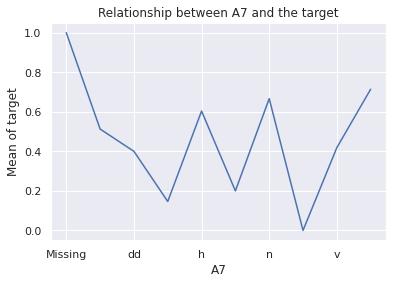

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')


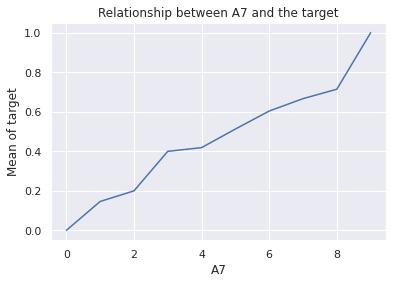

In [ ]:
#범주형 변수의 범주값을 범주의 빈도 등으로 교체
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3, random_state=0)
count_map = X_train['A7'].value_counts().to_dict()
count_map
#빈도 대신 비율인 경우
frequency_map = (X_train['A6'].value_counts() / len(X_train) ).to_dict()
#변수에 반영
X_train['A7'] = X_train['A7'].map(count_map)
X_test['A7'] = X_test['A7'].map(count_map)

#여러 특정 변수에 적용
def count_mappings(df, variable):
	return df[variable].value_counts().to_dict()
def frequency_mappings(df, variable):
	return (df[variable].value_counts() / len(df)).to_dict()
def encode(train, test, variable, mapping):
	X_train[variable] = X_train[variable].map(mapping)
	X_test[variable] = X_test[variable].map(mapping)
vars_categorical = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

for variable in vars_categorical:
	mappings = count_mappings(X_train, variable)
	encode(X_train, X_test, variable, mappings)

#범주를 순서대로 인코딩
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data, data['A16'], test_size=0.3, random_state=0)
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()

#범주별 평균 구하기
ordered_labels =X_train.groupby(['A7'])['A16'].mean().sort_values().index
print(ordered_labels)

ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
X_train['A7'] = X_train['A7'].map(ordinal_mapping)
X_test['A7'] = X_test['A7'].map(ordinal_mapping)

X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and the target')
plt.ylabel('Mean of target')
plt.show()


In [ ]:
#rare, infrequent 범주 그룹화
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('creditApprovalUCI.csv')
X_train, X_test, y_train, y_test = train_test_split(data.drop(labels=['A16'], axis=1), data['A16'],test_size=0.3,random_state=0)
temp = X_train['A7'].value_counts() / len(X_train)

temp[temp>0.05]
#5%미만을 rare 범주로 변경
def find_frequent_labels(df, variable, tolerance):
	temp = df[variable].value_counts() / len(df)
	frequent = [x for x in temp.loc[temp>tolerance].index.values]
	return frequent

frequent_cat = find_frequent_labels(X_train, 'A7', 0.05)
frequent_cat
X_train['A7'] = np.where(X_train['A7'].isin(frequent_cat), X_train['A7'], 'Rare')
X_test['A7'] = np.where(X_test['A7'].isin(frequent_cat), X_test['A7'], 'Rare')

X_train['A7'].value_counts() / len(X_train)

v       0.573499
h       0.209110
ff      0.084886
bb      0.080745
Rare    0.051760
Name: A7, dtype: float64

In [ ]:
pd.DataFrame(['a', 'b', 'c','a', 'c']).isin(['a', 'b'])

0
0   True
1   True
2  False
3   True
4  False

- Transforming Numerical Variables

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

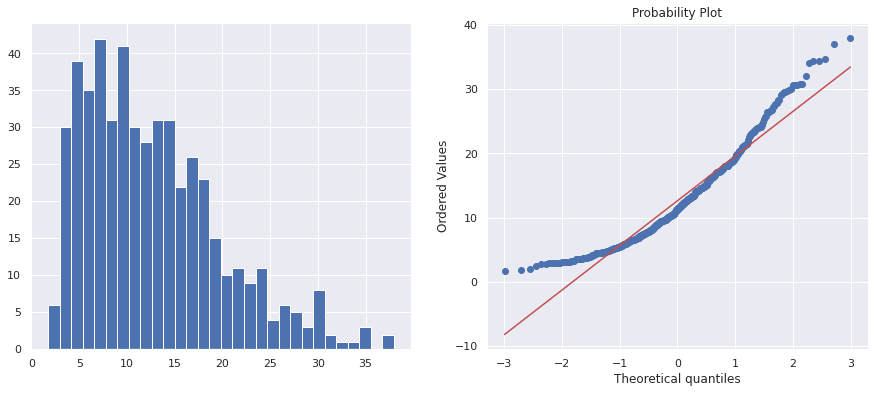

In [ ]:
#log 변환
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

data
def diagnostic_plots(df, variable):
	plt.figure(figsize=(15,6))
	plt.subplot(1, 2, 1)
	df[variable].hist(bins=30)
	plt.subplot(1, 2, 2)
	stats.probplot(df[variable], dist="norm", plot=plt)
	plt.show()

diagnostic_plots(data, 'LSTAT')

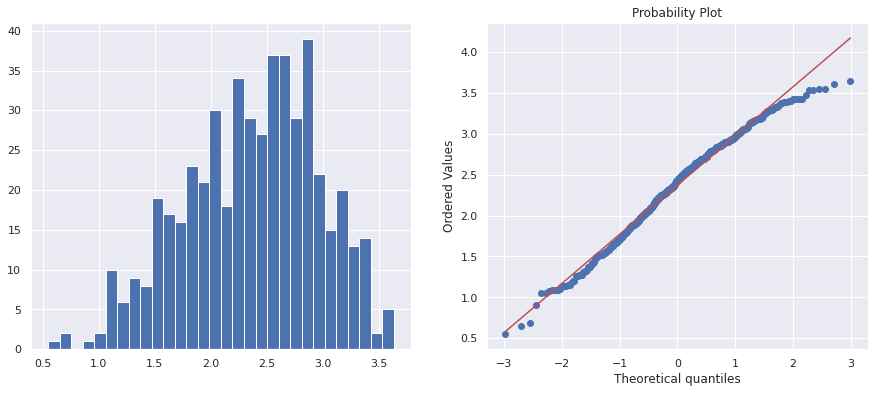

In [ ]:
data_tf = data.copy()	#data_tf=data인 경우에는 두 데이터프레임이 같이 영향
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.log(data[['LSTAT', 'NOX', 'DIS', 'RM']])
diagnostic_plots(data_tf, 'LSTAT')

#sklearn으로 변환
transformer = FunctionTransformer(np.log)
data_tf = transformer.transform(data[['LSTAT', 'NOX', 'DIS', 'RM']])
data_tf = pd.DataFrame(data_tf, columns = ['LSTAT', 'NOX', 'DIS', 'RM'])


In [ ]:
np.reciprocal(data)

CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
0    158.227848  0.055556  0.432900   inf  1.858736  0.152091  0.015337   
1     36.616624       inf  0.141443   inf  2.132196  0.155739  0.012674   
2     36.643459       inf  0.141443   inf  2.132196  0.139179  0.016367   
3     30.892802       inf  0.458716   inf  2.183406  0.142898  0.021834   
4     14.482259       inf  0.458716   inf  2.183406  0.139919  0.018450   
..          ...       ...       ...   ...       ...       ...       ...   
501   15.966789       inf  0.083822   inf  1.745201  0.151676  0.014472   
502   22.089684       inf  0.083822   inf  1.745201  0.163399  0.013038   
503   16.458196       inf  0.083822   inf  1.745201  0.143349  0.010989   
504    9.124920       inf  0.083822   inf  1.745201  0.147189  0.011198   
505   21.092596       inf  0.083822   inf  1.745201  0.165837  0.012376   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    0.244499  1.000000  0.003378  0.065359  0.002520  0.200803  
1    0.201325  0.500000  0.004132  0.056180  0.002520  0.109409  
2    0.201325  0.500000  0.004132  0.056180  0.002546  0.248139  
3    0.164957  0.333333  0.004505  0.053476  0.002534  0.340136  
4    0.164957  0.333333  0.004505  0.053476  0.002520  0.187617  
..        ...       ...       ...       ...       ...       ...  
501  0.403454  1.000000  0.003663  0.047619  0.002551  0.103413  
502  0.437158  1.000000  0.003663  0.047619  0.002520  0.110132  
503  0.461361  1.000000  0.003663  0.047619  0.002520  0.177305  
504  0.418603  1.000000  0.003663  0.047619  0.002542  0.154321  
505  0.399202  1.000000  0.003663  0.047619  0.002520  0.126904  

[506 rows x 13 columns]

- 역수 변환

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

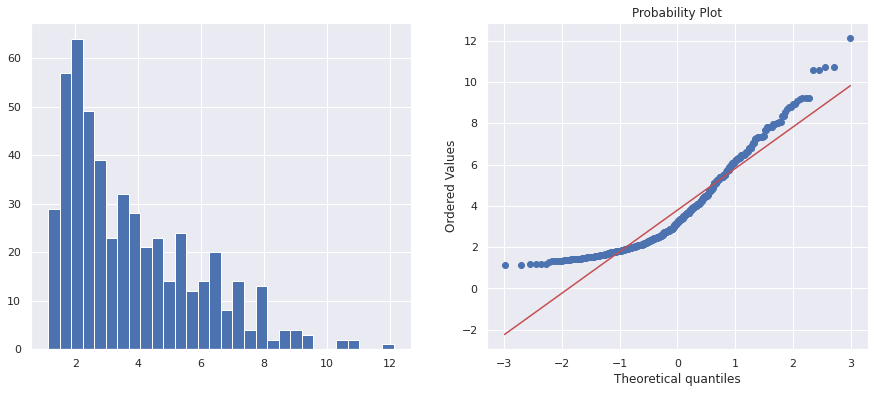

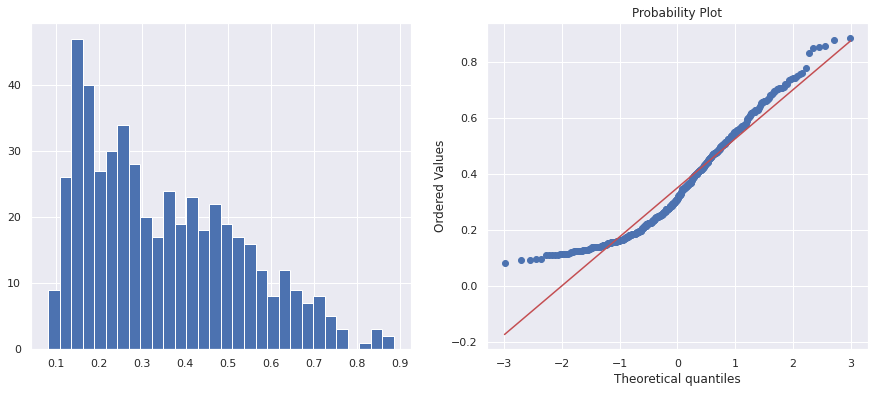

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
from sklearn.preprocessing import FunctionTransformer


boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

def diagnostic_plots(df, variable):
	plt.figure(figsize=(15,6))
	plt.subplot(1, 2, 1)
	df[variable].hist(bins=30)
	plt.subplot(1, 2, 2)
	stats.probplot(df[variable], dist="norm", plot=plt)
	plt.show()

diagnostic_plots(data, 'DIS')
data_tf = data.copy()
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] =np.reciprocal(data[['LSTAT', 'NOX', 'DIS', 'RM']])
diagnostic_plots(data_tf, 'DIS')

#sklearn
transformer = FunctionTransformer(np.reciprocal)
data_tf = transformer.transform(data[['LSTAT', 'NOX', 'DIS','RM']])
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = transformer.transform(data[['LSTAT', 'NOX', 'DIS','RM']])


#square root
data_tf = data.copy()
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = np.sqrt(data[['LSTAT', 'NOX', 'DIS', 'RM']])

#sklearn
transformer = FunctionTransformer(np.sqrt)
data_tf = transformer.transform(data[['LSTAT', 'NOX', 'DIS', 'RM']])
data_tf = pd.DataFrame(data_tf, columns=['LSTAT', 'NOX', 'DIS', 'RM'])

data_tf = data.copy()
data_tf[['LSTAT', 'NOX', 'DIS', 'RM']] = transformer.transform(data[['LSTAT', 'NOX', 'DIS', 'RM']])


- Deriving Features from Dates and Time Variables

In [ ]:
import pandas as pd

rng_ = pd.date_range('2019-03-05', periods=20, freq='T')
type(rng_)

df = pd.DataFrame({'date': rng_})
df.head()
df.dtypes
df['date'].dt.time
df['date_part'] = df['date'].dt.date
df['date_part'].head()

df['time_part'] = df['date'].dt.time
df['time_part'].head()

0    00:00:00
1    00:01:00
2    00:02:00
3    00:03:00
4    00:04:00
Name: time_part, dtype: object

In [ ]:
df = pd.DataFrame({'date_var':['Jan-2015', 'Apr-2013', 'Jun-2014','Jan-2015']})
pd.to_datetime(df['date_var'])

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
Name: date_var, dtype: datetime64[ns]

In [ ]:


df['datetime_var'] = pd.to_datetime(df['date_var'])
df

df['date'] = df['datetime_var'].dt.date
df['time'] = df['datetime_var'].dt.time
df

date_var datetime_var        date      time
0  Jan-2015   2015-01-01  2015-01-01  00:00:00
1  Apr-2013   2013-04-01  2013-04-01  00:00:00
2  Jun-2014   2014-06-01  2014-06-01  00:00:00
3  Jan-2015   2015-01-01  2015-01-01  00:00:00

In [ ]:
#달과 연도 표시
import numpy as np
import pandas as pd
rng_ = pd.date_range('2019-03-05', periods=20, freq='M')
df = pd.DataFrame({'date': rng_})
df.head()
df['year'] = df['date'].dt.year
df.head()

df['month'] = df['date'].dt.month
df.head()


df['quarter'] = df['date'].dt.quarter
df.head()

df['semester'] = np.where(df['quarter'].isin([1,2]), 1, 2)
df.head()

date  year  month  quarter  semester
0 2019-03-31  2019      3        1         1
1 2019-04-30  2019      4        2         1
2 2019-05-31  2019      5        2         1
3 2019-06-30  2019      6        2         1
4 2019-07-31  2019      7        3         2

In [ ]:
#day week표현
import numpy as np
import pandas as pd
rng_ = pd.date_range('2019-03-05', periods=20, freq='D')
df = pd.DataFrame({'date': rng_})
df.head()
df['day_mo'] = df['date'].dt.day
df.head()

df['day_week'] = df['date'].dt.dayofweek
df

df['day_week'].unique()



df['week'] = df['date'].dt.week
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.


date  day_mo  day_week  week
0 2019-03-05       5         1    10
1 2019-03-06       6         2    10
2 2019-03-07       7         3    10
3 2019-03-08       8         4    10
4 2019-03-09       9         5    10

In [ ]:
#datetime에서 time 추출
import numpy as np
import pandas as pd

rng_ = pd.date_range('2019-03-05', periods=20, freq='1h15min10s')
df = pd.DataFrame({'date': rng_})
df.head()
df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute
df['sec'] = df['date'].dt.second
df.head()
#to_datetime()를 사용하면 object에서 datetime으로 변환
df[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for
x in df['date']])
df.head()

df['is_morning'] = np.where( (df['hour'] < 12) & (df['hour'] > 6), 1, 0 )
df.head()
#datetime 변수간 측정된 기간 표현
import datetime
import numpy as np
import pandas as pd

rng_hr = pd.date_range('2019-03-05', periods=20, freq='H')
rng_month = pd.date_range('2019-03-05', periods=20, freq='M')
df = pd.DataFrame({'date1': rng_hr, 'date2': rng_month})
df.head()

df['elapsed_days'] = (df['date2'] - df['date1']).dt.days
df.head()


df['months_passed'] = ((df['date2'] - df['date1']) /
np.timedelta64(1, 'M'))
df['months_passed'] = np.round(df['months_passed'],0)
df.head()

df['diff_seconds'] = (df['date2'] -
df['date1'])/np.timedelta64(1,'s')
df['diff_minutes'] = (df['date2'] -
df['date1'])/np.timedelta64(1,'m')
df.head()

df['to_today'] = (datetime.datetime.today() - df['date1'])
df.head()


date1      date2  elapsed_days  months_passed  diff_seconds  \
0 2019-03-05 00:00:00 2019-03-31            26            1.0     2246400.0   
1 2019-03-05 01:00:00 2019-04-30            55            2.0     4834800.0   
2 2019-03-05 02:00:00 2019-05-31            86            3.0     7509600.0   
3 2019-03-05 03:00:00 2019-06-30           116            4.0    10098000.0   
4 2019-03-05 04:00:00 2019-07-31           147            5.0    12772800.0   

   diff_minutes                  to_today  
0       37440.0 1192 days 11:39:03.323166  
1       80580.0 1192 days 10:39:03.323166  
2      125160.0 1192 days 09:39:03.323166  
3      168300.0 1192 days 08:39:03.323166  
4      212880.0 1192 days 07:39:03.323166

In [ ]:
#다른 시간대의 시간 처리
import pandas as pd

df = pd.DataFrame()
df['time1'] = pd.concat([
	pd.Series(pd.date_range(start='2015-06-10 09:00', freq='H', periods=3,tz='Europe/Berlin')),
	pd.Series(pd.date_range(start='2015-09-10 09:00', freq='H', periods=3,tz='US/Central'))	
	], axis=0)


df['time2'] = pd.concat([
	pd.Series(pd.date_range(start='2015-07-01 09:00', freq='H', periods=3,tz='Europe/Berlin')),
	pd.Series(pd.date_range(start='2015-08-01 09:00', freq='H', periods=3,tz='US/Central'))
], axis=0)
df

df['time1_utc'] = pd.to_datetime(df['time1'], utc=True)
df['time2_utc'] = pd.to_datetime(df['time2'], utc=True)
df

df['elapsed_days'] = (df['time2_utc'] - df['time1_utc']).dt.days
df['elapsed_days'].head()

df['time1_london'] = df['time1_utc'].dt.tz_convert('Europe/London')
df['time2_berlin'] = df['time1_utc'].dt.tz_convert('Europe/Berlin')
df[['time1_london', 'time2_berlin']]



time1_london              time2_berlin
0 2015-06-10 08:00:00+01:00 2015-06-10 09:00:00+02:00
1 2015-06-10 09:00:00+01:00 2015-06-10 10:00:00+02:00
2 2015-06-10 10:00:00+01:00 2015-06-10 11:00:00+02:00
0 2015-09-10 15:00:00+01:00 2015-09-10 16:00:00+02:00
1 2015-09-10 16:00:00+01:00 2015-09-10 17:00:00+02:00
2 2015-09-10 17:00:00+01:00 2015-09-10 18:00:00+02:00

- Performing Feature Scaling
 - MinMax
 - Standard
 - ...

In [ ]:
#standard scaling
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(
data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3,
random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  #np.array
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
scaler.mean_
scaler.scale_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

array([8.34141658e+00, 2.36196246e+01, 6.98393565e+00, 2.46476009e-01,
       1.15437239e-01, 7.01016354e-01, 2.79987983e+01, 2.06473886e+00,
       8.65974217e+00, 1.70351284e+02, 2.22166426e+00, 8.55009244e+01,
       7.06848020e+00])

In [ ]:
#minmax scaling
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#absolute scaling: 각 값을 변수의 최대값으로 나눔, -1~1사이로 조정
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3,random_state=0)
scaler = MaxAbsScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

- Applying Math Computations to Features
 - Combining multiple features with statistical operations

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

features = ['mean smoothness', 'mean compactness',
'mean concavity', 'mean concave points',
'mean symmetry']

df['added_features'] = df[features].sum(axis=1)
df['prod_features'] = df[features].prod(axis=1)
df['mean_features'] = df[features].mean(axis=1)
df['std_features'] = df[features].std(axis=1)
df['max_features'] = df[features].max(axis=1)
df['min_features'] = df[features].min(axis=1)

f_t = df[features].agg(['sum', 'prod','mean','std', 'max', 'min'], axis='columns')


#Combining pairs of features with mathematical functions
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df['difference'] = df['worst compactness'].sub(df['mean compactness'])
df['difference'] = df['worst compactness'] - (df['mean compactness'])
df['quotient'] = df['worst radius'].div(df['mean radius'])
df['quotient'] = df['worst radius'] / (df['mean radius'])

features = ['mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry']
worst_f = ['worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']
df['worst'] = df[worst_f].sum(axis=1)
df[features] = df[features].div(df['worst'], axis=0)

#Performing polynomial expansion
#[a, b, c]^2 = 1, a, b, c, ab, ac, bc, a^2, b^2, c^2, abc

import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(
data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3,
random_state=0)

poly = PolynomialFeatures(degree=3, interaction_only=False,
include_bias=False)

poly.fit(X_train[['LSTAT', 'RM', 'NOX']])

train_t = poly.transform(X_train[['LSTAT', 'RM', 'NOX']])
test_t = poly.transform(X_test[['LSTAT', 'RM', 'NOX']])

poly.get_feature_names(['LSTAT', 'RM', 'NOX'])

test_t = pd.DataFrame(test_t)
test_t.columns = poly.get_feature_names(['LSTAT', 'RM', 'NOX'])


- 단순한 PCA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Text(0, 0.5, 'Percentage of Variance Explained')

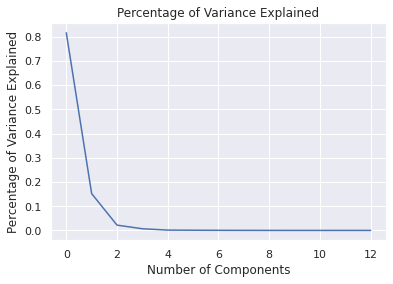

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(
data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3,
random_state=0)

pca = PCA(n_components=None)
pca.fit(X_train)
train_t = pca.transform(X_train)
test_t = pca.transform(X_test)

plt.plot(pca.explained_variance_ratio_)
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained')

- Creating Features with Transactional and Time Series data
 - aggregating transaction

In [ ]:
import pandas as pd
import featuretools as ft

data_dict = ft.demo.load_mock_customer()

data = data_dict["transactions"].merge(
data_dict["sessions"]).merge(data_dict["customers"]) 
data = data[['customer_id', 'transaction_id', 'transaction_time','amount']]


operations = ['sum', 'max', 'min', 'mean', 'median', 'std', 'count'] 
feature_names = [ 'total_amount', 'max_amount', 'min_amount','mean_amount', 'median_amount', 'std_amount','number of transactions']

df = pd.DataFrame()
df[feature_names] =data.groupby('customer_id')['amount'].agg(operations)
df



/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
/usr/local/lib/python3.7/dist-packages/featuretools/__init__.py:67: FutureWarning: Featuretools may not support Python 3.7 in next non-bugfix release.
  FutureWarning,


total_amount  max_amount  min_amount  mean_amount  median_amount  \
customer_id                                                                     
1                 9025.62      139.43        5.81    71.631905         69.715   
2                 7200.28      146.81        8.73    77.422366         75.960   
3                 6236.62      149.15        5.89    67.060430         58.930   
4                 8727.68      149.95        5.73    80.070459         81.410   
5                 6349.66      149.02        7.55    80.375443         78.870   

             std_amount  number of transactions  
customer_id                                      
1             40.442059                     126  
2             37.705178                      93  
3             43.683296                      93  
4             45.068765                     109  
5             44.095630                      79

In [ ]:
#aggregating transactions with time window
import pandas as pd
cols = ['date', 'Appliances', 'lights']
data = pd.read_csv('energydata_complete.csv', usecols=cols)
data['date'] = pd.to_datetime(data['date'])

data_rolled = data.rolling(window=6, on='date').mean()
data_rolled.head(10)

#또는 이렇게도 가능: data.rolling(window='60min', on='date', min_periods=6).mean()

operations = ['sum', 'max', 'min', 'mean', 'median', 'std']

op_dict = {key: operations for key in ['Appliances', 'lights']}
op_dict

data_rolled = data.set_index('date').rolling(window='60min').agg(op_dict)
data_rolled.head(10)

#user defined 계산: 시계열에서 local minima, local maxima
from scipy.signal import find_peaks
def find_no_peaks(x):
	peaks, _ = find_peaks(x)
	return len(peaks)
def find_no_valleys(x):
	valleys, _ = find_peaks(1/x)
	return len(valleys)

data_rolled = data.set_index('date').rolling(window='1d').agg([find_no_peaks, find_no_valleys])
for row in range(144, 1440, 144):	
	print(data_rolled.iloc[[row]])



                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-12 17:00:00          25.0            26.0          14.0   

                                     
                    find_no_valleys  
date                                 
2016-01-12 17:00:00            13.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                                                              
2016-01-13 17:00:00          33.0            32.0          11.0   

                                     
                    find_no_valleys  
date                                 
2016-01-13 17:00:00            10.0  
                       Appliances                        lights  \
                    find_no_peaks find_no_valleys find_no_peaks   
date                    

- Up sampling, Down Sampling
 - down sampling: 데이터 수를 줄이기
 - up sampling: 늘리기

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   
import seaborn as sns

#파티셔닝 수행
from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

pima_df = pd.read_csv("diabetes.csv")
pima_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:

pima_df[~pima_df.applymap(np.isreal).all(1)]
pima_df = pima_df.fillna(pima_df.median())
pima_df

pima_df.describe().transpose()
pima_df.groupby(["Outcome"]).count()
sns.pairplot(pima_df , hue='Outcome' , diag_kind = 'kde')

 - Up sampling

In [ ]:
array = pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

#SMOTE for upsampling smaller cases
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   
#Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))
print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


Before UpSampling, counts of label '1': 184
Before UpSampling, counts of label '0': 353 

After UpSampling, counts of label '1': 353
After UpSampling, counts of label '0': 353 

After UpSampling, the shape of train_X: (706, 7)
After UpSampling, the shape of train_y: (706,) 



In [ ]:
# Fit the model on original data i.e. before upsampling
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)

test_pred = model.predict(X_test)

print(metrics.classification_report(y_test, test_pred))
print(metrics.confusion_matrix(y_test, test_pred))

# fit model on upsampled data 

model.fit(X_train_res, y_train_res)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))





0.7619047619047619
              precision    recall  f1-score   support

         0.0       0.77      0.89      0.83       147
         1.0       0.74      0.54      0.62        84

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231

[[131  16]
 [ 39  45]]
0.7575757575757576
[[110  37]
 [ 19  65]]
              precision    recall  f1-score   support

         0.0       0.85      0.75      0.80       147
         1.0       0.64      0.77      0.70        84

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.77      0.76      0.76       231



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


 - Down Sampling

In [ ]:
#Down Sampling the larger class
non_diab_indices = pima_df[pima_df['Outcome'] == 0].index   # Get the record numbers of non-diab cases
no_diab = len(pima_df[pima_df['Outcome'] == 0])             # how many non-diab cases
print(no_diab)

diab_indices = pima_df[pima_df['Outcome'] == 1].index       # record number of the diabeteics cases
diab = len(pima_df[pima_df['Outcome'] == 1])                # how many diabetic cases
print(diab)

random_indices = np.random.choice( non_diab_indices, no_diab - 200 , replace=False)    #Randomly pick up 200 non-diab indices

down_sample_indices = np.concatenate([diab_indices,random_indices])  # combine the 200 non-diab indices with diab indices

pima_df_down_sample = pima_df.loc[down_sample_indices]  # Extract all those records for diab and non-diab to create new set
pima_df_down_sample.shape
pima_df_down_sample.groupby(["Outcome"]).count()  # look at the class distribution after downsample

array = pima_df_down_sample.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

print('After DownSampling, the shape of X_train: {}'.format(X_train.shape))
print('After DownSampling, the shape of X_test: {} \n'.format(X_test.shape))

# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))


500
268
After DownSampling, the shape of X_train: (397, 7)
After DownSampling, the shape of X_test: (171, 7) 

0.8011695906432749
[[82 16]
 [18 55]]
              precision    recall  f1-score   support

         0.0       0.82      0.84      0.83        98
         1.0       0.77      0.75      0.76        73

    accuracy                           0.80       171
   macro avg       0.80      0.80      0.80       171
weighted avg       0.80      0.80      0.80       171



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#IMBLearn Random Under Sampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
y_rus
y_rus.shape

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)
y_ros
y_ros.shape
X_ros.shape


(404, 7)

##4. 패턴 발견을 위한  Association Rule

- mlxtend 설치

In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#1. 리스트 형태로 표현된 Transaction 처리
dataset = [['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
           ['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

type(dataset)
dataset


[['Milk', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
 ['Coke', 'Cookie', 'Apple', 'Beans', 'Eggs', 'Yogurt'],
 ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
 ['Milk', 'Orange', 'Corn', 'Beans', 'Yogurt'],
 ['Corn', 'Cookie', 'Cookie', 'Beans', 'Ice cream', 'Eggs']]

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
te_ary
df = pd.DataFrame(te_ary, columns=te.columns_)
df

#apriori
#입력: pandas DataFrame, min_support 기본값0.5, use_colnames 기본값 False, max_len 기본값 none

apriori(df, min_support=0.6)
apriori(df, min_support=0.6, use_colnames=True)
frequent_itemsets = apriori(df, min_support=0.6, use_colnames=True)

frequent_itemsets

support               itemsets
0       0.6                (Apple)
1       0.8                (Beans)
2       0.6               (Cookie)
3       0.8                 (Eggs)
4       0.6                 (Milk)
5       0.6               (Yogurt)
6       0.6          (Eggs, Apple)
7       0.6        (Cookie, Beans)
8       0.6          (Eggs, Beans)
9       0.6        (Yogurt, Beans)
10      0.6         (Eggs, Cookie)
11      0.6  (Eggs, Cookie, Beans)

In [ ]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets
#필터링을 위해  length column 추가

#필터링을 위해  length column 추가

frequent_itemsets[ (frequent_itemsets['length'] == 2)  ]

frequent_itemsets[ (frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.6) ]


support         itemsets  length
6       0.6    (Eggs, Apple)       2
7       0.6  (Cookie, Beans)       2
8       0.6    (Eggs, Beans)       2
9       0.6  (Yogurt, Beans)       2
10      0.6   (Eggs, Cookie)       2

In [ ]:
#association_rules
#입력: dataframe
#metric: confidence(기본값), lift 등
#min_threshold: 설정된 metric으로 필터링, 0.8(기본값)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)


In [ ]:
#결과 중 filtering
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules[ (rules['antecedent_len'] >= 2) & (rules['confidence'] > 0.75) & (rules['lift'] > 1.2) ]



-파일로 부터 패턴 발견

In [ ]:
#csv/엑셀로 부터 transaction 읽은 후 association rule
#출처: UCI machine learning databases
df = pd.read_excel('OnlineRetail2.xlsx')
df.head()

#자료 정리
df['Description'] = df['Description'].str.strip()	#Description 컬럼의 문자열 전후 공백 정리	
df['InvoiceNo'] = df['InvoiceNo'].astype('str')		#InvoiceNo을 문자열로 변경
df = df[~df['InvoiceNo'].str.contains('C')]		#InvoiceNo 중 정상적이지 않은 거래 건(C문자 포함 거래) 제외

#apriori에 적용할 데이터 형태로 변경
basket = (df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
# 두 컬럼을 기준으로 Quantity값을 정리/ 합계구하고, 형태 변환 / index새로 생성/NaN값은0변환 / InvoiceNo으로 index 설정



In [ ]:
#binarize
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

type(basket)

#전체 자료에 함수 적용
basket_sets = basket.applymap(encode_units)
basket_sets.columns
basket_sets

Description  *Boombox Ipod Classic  10 COLOUR SPACEBOY PEN  \
InvoiceNo                                                    
536365                           0                       0   
536366                           0                       0   
536367                           0                       0   
536368                           0                       0   
536369                           0                       0   
...                            ...                     ...   
538830                           0                       0   
538831                           0                       0   
538832                           0                       0   
538836                           0                       0   
538839                           0                       0   

Description  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
InvoiceNo                                                            
536365                                0                          0   
536366                                0                          0   
536367                                0                          0   
536368                                0                          0   
536369                                0                          0   
...                                 ...                        ...   
538830                                0                          0   
538831                                0                          0   
538832                                0                          0   
538836                                0                          0   
538839                                0                          0   

Description  12 EGG HOUSE PAINTED WOOD  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                  
536365                               0                                 0   
536366                               0                                 0   
536367                               0                                 0   
536368                               0                                 0   
536369                               0                                 0   
...                                ...                               ...   
538830                               0                                 0   
538831                               0                                 0   
538832                               0                                 0   
538836                               0                                 0   
538839                               0                                 0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                     0                              0   
536366                                     0                              0   
536367                                     0                              0   
536368                                     0                              0   
536369                                     0                              0   
...                                      ...                            ...   
538830                                     0                              0   
538831                                     0                              0   
538832                                     0                              0   
538836                                     0                              0   
538839                                     0                              0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536365                                         0                            0   
536366                

In [ ]:
#불필요한 컬럼 제거
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.drop('amazon', inplace=True, axis=1)
basket_sets.drop('check', inplace=True, axis=1)
basket_sets.drop('faulty', inplace=True, axis=1)
basket_sets.drop('damages', inplace=True, axis=1)
type(basket_sets)

basket_sets

Description  *Boombox Ipod Classic  10 COLOUR SPACEBOY PEN  \
InvoiceNo                                                    
536365                           0                       0   
536366                           0                       0   
536367                           0                       0   
536368                           0                       0   
536369                           0                       0   
...                            ...                     ...   
538830                           0                       0   
538831                           0                       0   
538832                           0                       0   
538836                           0                       0   
538839                           0                       0   

Description  12 COLOURED PARTY BALLOONS  12 DAISY PEGS IN WOOD BOX  \
InvoiceNo                                                            
536365                                0                          0   
536366                                0                          0   
536367                                0                          0   
536368                                0                          0   
536369                                0                          0   
...                                 ...                        ...   
538830                                0                          0   
538831                                0                          0   
538832                                0                          0   
538836                                0                          0   
538839                                0                          0   

Description  12 EGG HOUSE PAINTED WOOD  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                  
536365                               0                                 0   
536366                               0                                 0   
536367                               0                                 0   
536368                               0                                 0   
536369                               0                                 0   
...                                ...                               ...   
538830                               0                                 0   
538831                               0                                 0   
538832                               0                                 0   
538836                               0                                 0   
538839                               0                                 0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                     0                              0   
536366                                     0                              0   
536367                                     0                              0   
536368                                     0                              0   
536369                                     0                              0   
...                                      ...                            ...   
538830                                     0                              0   
538831                                     0                              0   
538832                                     0                              0   
538836                                     0                              0   
538839                                     0                              0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536365                                         0                            0   
536366                

In [ ]:
#apriori
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]


antecedents  \
0  (KNITTED UNION FLAG HOT WATER BOTTLE)   
1       (RED WOOLLY HOTTIE WHITE HEART.)   
2    (PAPER CHAIN KIT VINTAGE CHRISTMAS)   
3       (PAPER CHAIN KIT 50'S CHRISTMAS)   

                             consequents  antecedent support  \
0       (RED WOOLLY HOTTIE WHITE HEART.)            0.086716   
1  (KNITTED UNION FLAG HOT WATER BOTTLE)            0.108856   
2       (PAPER CHAIN KIT 50'S CHRISTMAS)            0.096863   
3    (PAPER CHAIN KIT VINTAGE CHRISTMAS)            0.125461   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.108856  0.058118    0.670213  6.156870  0.048679    2.702178  
1            0.086716  0.058118    0.533898  6.156870  0.048679    1.959410  
2            0.125461  0.066421    0.685714  5.465546  0.054268    2.782623  
3            0.096863  0.066421    0.529412  5.465546  0.054268    1.919165

In [ ]:
#음악 콘텐츠 관련 Transaction 처리
import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import pandas as pd

df = pd.read_csv('data_3.csv')
df.head()

df['artist'] = df['artist'].str.strip()		#앞뒤 공백을 정리
df.dropna(axis=0, subset=['user'], inplace=True)  #결측치 제거...
df['user'] = df['user'].astype('str')		#str으로 값의 타입을 변환.


In [ ]:
df

user                                        artist  qty
0         1                         red hot chili peppers    1
1         1                       the black dahlia murder    1
2         1                                     goldfrapp    1
3         1                              dropkick murphys    1
4         1                                      le tigre    1
...     ...                                           ...  ...
19994  1312                                  the national    1
19995  1312                                    bloc party    1
19996  1312                   the jimi hendrix experience    1
19997  1312                                         cream    1
19998  1312  ...and you will know us by the trail of dead    1

[19999 rows x 3 columns]

In [ ]:
basket=df.groupby(['user', 'artist'])['qty'].sum().unstack().reset_index().fillna(0).set_index('user')
basket

In [ ]:


def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.columns

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()
rules[ (rules['lift'] >= 1) & (rules['confidence'] >= 0.1) ]



antecedents    consequents  antecedent support  consequent support  \
0    (radiohead)     (coldplay)            0.201780            0.149357   
1     (coldplay)    (radiohead)            0.149357            0.201780   
2  (the beatles)    (radiohead)            0.190900            0.201780   
3    (radiohead)  (the beatles)            0.201780            0.190900   

    support  confidence      lift  leverage  conviction  
0  0.065282    0.323529  2.166147  0.035145    1.257472  
1  0.065282    0.437086  2.166147  0.035145    1.418014  
2  0.071217    0.373057  1.848827  0.032697    1.273193  
3  0.071217    0.352941  1.848827  0.032697    1.250427

#5. 주성분 분석

- Dimension Reduction
  - 차원의 저주: 변수(차원)가 증가하면서 고차원으로 갈수록 희소(sparse)해짐 (무작위로 두 점의 평균 거리를 산출했을 때 그 거리가 멀어짐)
  - 해결하기 위해 엄청나게 많은 데이터를 확보하는 방법이 있지만, 차원이 늘어날수록 필요한 데이터의 양이 기하급수적으로 증가하여, 현실적으로는 불가능
  - 데이터를 저차원으로 투영하여 차원 축소를 진행

- PCA (Principal Component Analysis): 데이터를 정사영시켜 차원을 낮춘다면, 어떤 벡터에 정사영 시키는 것이 원 데이터 구조를 잘 유지할 수 있을까"에 대한 분석
 - "데이터 벡터를 어떤 벡터에 정사영하는 것이 최적의 결과일지
정사영할 벡터를 찾을 때 데이터 분포의 중심을 축(pivot)으로 하는 벡터를 찾는 것이 좋지 않을지"

- PCA의 가정
  - 대상이 되는 데이터는 linear하며, 우리가 찾은 선들은 직교
linear한 것을 가정, 선형 결합으로 표현하기 때문에 비선형 데이터에 취약할 수 있음
큰 분산을 가지는 축이 중요한 정보를 가지고 있을 것
  - 분산이 높다는 것은, 감소시킨 차원이 일정 부분 변화할 때 기존 변수도 높은 관계성을 가지고 변화한다는 것을 의미
  - 공분산: feature pairs의 변동이 얼마나 유사한지. 즉, 하나의 feature이 변화할 때 다른 feature의 변화가 얼마나 유사한지
  - PCA의 과정: 정사영 후 각 차원의 분산을 최대화하는 것에 관심이 있음
가장 큰 분산을 가지는 축을 찾은 후, 먼저 찾은 축을 기준으로 직교하는 축들 중에 또 가장 큰 축을 찾는 과정을 거침
  - 새로 생성된 각 차원들은 선형독립임
  - 하나의 component가 다른 component보다 적은 분산을 가질 경우 분산이 큰 component를 더 중요하게 반영하여 PCA가 수행될 것임
  - PCA를 하는 것은 자료를 요약하고, 메모리를 절약하고 과적합 방지, 정보손실을 적게 하면서도 불필요한 변수들을 새로운 변수로/제거, 이미지의 경우 (e.g., eigenface) 노이즈 감소 등의 효과

In [ ]:
!pip install factor_analyzer

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [ ]:
data1 = pd.read_csv('pm_train.csv', index_col =0)
data1.drop(['id', 'cycle'], axis=1, inplace=True)
data1.dropna(inplace=True)
# data.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25']
data1.head()
data1.shape

(20631, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 61617 to 67560
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      2436 non-null   float64
 1   A2      2436 non-null   float64
 2   A3      2436 non-null   float64
 3   A4      2436 non-null   float64
 4   A5      2436 non-null   float64
 5   C1      2436 non-null   float64
 6   C2      2436 non-null   float64
 7   C3      2436 non-null   float64
 8   C4      2436 non-null   float64
 9   C5      2436 non-null   float64
 10  E1      2436 non-null   float64
 11  E2      2436 non-null   float64
 12  E3      2436 non-null   float64
 13  E4      2436 non-null   float64
 14  E5      2436 non-null   float64
 15  N1      2436 non-null   float64
 16  N2      2436 non-null   float64
 17  N3      2436 non-null   float64
 18  N4      2436 non-null   float64
 19  N5      2436 non-null   float64
 20  O1      2436 non-null   float64
 21  O2      2436 non-null   int64  


  - PCA을 수행하기 전 standardization을 통해 분산을 고정하는 것이 중요함
   - 데이터의 스케일에 따라 주성분의 설명 가능한 분산량이 달라질 수 있음
따라서, scaling(centering)을 통해 변수가 가진 값의 크기에 따라 설명 가능한 분산량이 왜곡되는 것에 따른 모델 성능이 저하를 방지함
   - 예를 들어, 키(m)와 몸무게(kg)가 다른 scale을 가지고 있을 때 (키가 더 적게 변화) scaling을 하지 않으면 몸무게가 maximal variance의 방향을 결정할 것임. 따라서 키(m)의 변화 1은 몸무게(kg)의 변화 1보다 더 중요하게 반영이 될 것인데 이렇게 다른 가중치를 두는 것을 옳지 않음
   - 공분산 행렬을 계산할 때 각 feature의 평균은 0으로 맞춰주어야 결과에 대해 직관적으로 해석하기 용이함

In [ ]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index = data.index)
data_scale.mean(axis=0).head()

A1   -2.061615e-16
A2   -5.614921e-16
A3   -7.031412e-16
A4    1.956563e-16
A5   -2.829337e-16
dtype: float64

In [ ]:
data1_scale = pd.DataFrame(StandardScaler().fit_transform(data1), columns=data1.columns, index = data1.index)
data1_scale.mean(axis=0).head()

setting1   -9.880129e-18
setting2    6.097267e-16
setting3    0.000000e+00
s1          0.000000e+00
s2          6.258537e-14
dtype: float64

In [ ]:
data1_scale.cov() # 공분산행렬

setting1  setting2  setting3   s1        s2        s3        s4  \
setting1  1.000048  0.011661       0.0  0.0  0.009030 -0.005651  0.009544   
setting2  0.011661  1.000048       0.0  0.0  0.007267  0.009068  0.014674   
setting3  0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s1        0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s2        0.009030  0.007267       0.0  0.0  1.000048  0.602639  0.714984   
s3       -0.005651  0.009068       0.0  0.0  0.602639  1.000048  0.678446   
s4        0.009544  0.014674       0.0  0.0  0.714984  0.678446  1.000048   
s5        0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s6       -0.001340  0.014355       0.0  0.0  0.132249  0.116045  0.150487   
s7       -0.009438 -0.016679       0.0  0.0 -0.702170 -0.664628 -0.793168   
s8       -0.000427  0.013285       0.0  0.0  0.662357  0.602510  0.746888   
s9       -0.004279 -0.005425       0.0  0.0  0.273778  0.322980  0.297443   
s10       0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s11       0.011658  0.011691       0.0  0.0  0.740056  0.695934  0.830176   
s12      -0.001491 -0.010923       0.0  0.0 -0.724614 -0.680340 -0.815630   
s13       0.002318  0.018157       0.0  0.0  0.661825  0.600992  0.745195   
s14      -0.004470 -0.006311       0.0  0.0  0.179761  0.237149  0.190757   
s15       0.007652  0.014157       0.0  0.0  0.676008  0.639952  0.758496   
s16       0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s17       0.002599  0.012280       0.0  0.0  0.629916  0.600046  0.703533   
s18       0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s19       0.000000  0.000000       0.0  0.0  0.000000  0.000000  0.000000   
s20      -0.005713 -0.010555       0.0  0.0 -0.661873 -0.625972 -0.748103   
s21      -0.014559 -0.007846       0.0  0.0 -0.668083 -0.633932 -0.745229   
ttf      -0.003199 -0.001948       0.0  0.0 -0.606513 -0.584549 -0.678981   

           s5        s6        s7  ...       s13       s14       s15  s16  \
setting1  0.0 -0.001340 -0.009438  ...  0.002318 -0.004470  0.007652  0.0   
setting2  0.0  0.014355 -0.016679  ...  0.018157 -0.006311  0.014157  0.0   
setting3  0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s1        0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s2        0.0  0.132249 -0.702170  ...  0.661825  0.179761  0.676008  0.0   
s3        0.0  0.116045 -0.664628  ...  0.600992  0.237149  0.639952  0.0   
s4        0.0  0.150487 -0.793168  ...  0.745195  0.190757  0.758496  0.0   
s5        0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s6        0.0  1.000048 -0.155728  ...  0.158284 -0.002112  0.149049  0.0   
s7        0.0 -0.155728  1.000048  ... -0.764648 -0.110058 -0.747087  0.0   
s8        0.0  0.152168 -0.767170  ...  0.826124 -0.144794  0.700983  0.0   
s9        0.0  0.019348 -0.217846  ... -0.034764  0.963203  0.293767  0.0   
s10       0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s11       0.0  0.160022 -0.822845  ...  0.780799  0.163416  0.780951  0.0   
s12       0.0 -0.155891  0.812752  ... -0.788479 -0.098145 -0.766089  0.0   
s13       0.0  0.158284 -0.764648  ...  1.000048 -0.147043  0.697696  0.0   
s14       0.0 -0.002112 -0.110058  ... -0.147043  1.000048  0.193770  0.0   
s15       0.0  0.149049 -0.747087  ...  0.697696  0.193770  1.000048  0.0   
s16       0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s17       0.0  0.130816 -0.692926  ...  0.627440  0.246633  0.669237  0.0   
s18       0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s19       0.0  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.0   
s20       0.0 -0.141425  0.736199  ... -0.686206 -0.187374 -0.707706  0.0   
s21       0.0 -0.137425  0.737482  ... -0.688981 -0.192424 -0.704077  0.0   
ttf       0.0 -0.128355  0.657255  ... -0.562596 -0.306784 -0.642698  0.0   

    

 - Principle component 수 선택
  - PC 선택: 몇 개까지 선택할지는 분석가의 결정에 따름
   - 방안 1: Eigen value가 1 이상일 때까지
   - 방안 2: Scree plot 그래프 기울기가 완만해지기 전의 값까지
   - 방안 3: 약 80% 이상의 분산을 설명하는 PC 개수 채택

In [ ]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)
print(data_scale)
print(X_p)

             A1        A2        A3        A4        A5        C1        C2  \
61617 -0.288867 -0.676006 -1.219235 -0.463061 -0.427781 -2.044561 -1.040527   
61618 -0.288867 -0.676006  0.306218 -1.809945  0.359284  0.384581 -0.282309   
61620  1.843498 -0.676006  0.306218 -0.463061 -0.427781 -0.425133  0.475910   
61621  1.132710 -0.676006  1.068944  0.210382  0.359284 -0.425133 -0.282309   
61622 -0.288867 -1.523972 -1.219235 -0.463061  0.359284 -0.425133 -0.282309   
...         ...       ...       ...       ...       ...       ...       ...   
67547  0.421921 -0.676006 -1.219235 -2.483387 -1.214845  0.384581 -0.282309   
67549  1.843498  0.171960  0.306218  0.210382 -1.214845  0.384581 -0.282309   
67556 -0.288867 -1.523972  0.306218 -1.809945  0.359284  0.384581  0.475910   
67559  1.843498 -2.371938 -1.981961 -0.463061 -0.427781  0.384581  0.475910   
67560 -0.288867 -1.523972 -2.744688 -0.463061 -2.001910  0.384581  0.475910   

             C3        C4        C5  ...        N1 

In [ ]:
# PCA 진행
pca = PCA(random_state=312)
X_p = pca.fit_transform(data1_scale)
print(X_p[0])

[-3.16414411e+00 -4.59252911e-01 -1.17166993e+00  4.75838017e-01
 -6.66436403e-01  8.79839073e-01  2.47914176e-02 -6.32462881e-01
 -3.24610262e-01  3.10733002e-02  6.50457730e-01  2.83419628e-01
  2.27959979e-01 -1.57382910e-01 -3.60382827e-01 -7.76110704e-01
 -4.29978138e-01  3.52308140e-01  5.78449757e-17 -1.03621545e-16
 -3.89024211e-17 -2.73502413e-17  8.31367829e-33 -1.62815136e-33
  3.13844598e-36]


- 방안 1. Eigen value가 1 이상일 때까지
Eigen vector (고유 벡터): 데이터가 어떤 방향으로 분산되어 있는지. 행렬이 벡터에 작용하는 주축(principal axis)의 방향을 나타냄
원 차원의 수만큼 eigenvector가 생성됨
주축 위에 정사영하는 것이 분산이 가장 큰 결과를 얻을 수 있음 (선형변환을 했을 때 크기만 바뀌고 방향이 변하지 않도록 함)
 - Eigen value (고유 값): 고유벡터 방향으로 얼마만큼의 크기로 벡터공간이 늘려지는가, 즉 고유벡터의 크기를 의미함
 - Eigen value가 큰 순서대로 고유 벡터를 정렬하는 것이, 중요한 순서대로 주성분을 구성한다는 의미



In [ ]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n')

print('적합한 PC 개수:', sum(ev >= 1))


eigen value: [5.13431118 2.75188667 2.14270195 1.85232761 1.54816285 1.07358247
 0.83953893 0.79920618 0.71898919 0.68808879 0.67637336 0.65179984
 0.62325295 0.59656284 0.56309083 0.54330533 0.51451752 0.49450315
 0.48263952 0.448921   0.42336611 0.40067145 0.38780448 0.38185679
 0.26253902] 

적합한 PC 개수: 6


   - 방안 2. Scree plot 그래프 기울기가 완만해지기 전까지
Scree plot: 고유값-주성분의 분산 변화를 보는 그래프로, 고유값 변화율이 완만해지는 부분이 필요한 주성분의 수

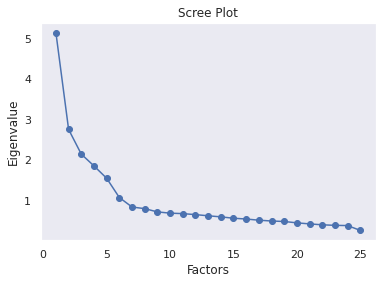

In [ ]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

   - Factors가 (6 -> 7) 이후로 (7 -> 8)에서 기울기가 완만해지는 것을 보임
따라서 기울기가 완만해지기 전의 값으로, 적합한 PC 개수는 6

In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [5.33528545e-01 1.18326752e-01 5.62421635e-02 5.51211132e-02
 5.34496546e-02 2.31532158e-02 2.19695804e-02 2.03705692e-02
 1.92173907e-02 1.69939918e-02 1.60838433e-02 1.41319815e-02
 1.14486390e-02 1.08581239e-02 9.79520804e-03 9.57524510e-03
 8.10775504e-03 1.62622762e-03 3.76367444e-34 2.99488961e-34
 3.23836303e-35 2.26332025e-35 2.27772856e-66 3.23060996e-67
 2.09096182e-71]
누적 분산 설명 비율:
 [0.53352855 0.6518553  0.70809746 0.76321857 0.81666823 0.83982144
 0.86179102 0.88216159 0.90137898 0.91837298 0.93445682 0.9485888
 0.96003744 0.97089556 0.98069077 0.99026602 0.99837377 1.
 1.         1.         1.         1.         1.         1.
 1.        ]


In [ ]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [5.33528545e-01 1.18326752e-01 5.62421635e-02 5.51211132e-02
 5.34496546e-02 2.31532158e-02 2.19695804e-02 2.03705692e-02
 1.92173907e-02 1.69939918e-02 1.60838433e-02 1.41319815e-02
 1.14486390e-02 1.08581239e-02 9.79520804e-03 9.57524510e-03
 8.10775504e-03 1.62622762e-03 3.76367444e-34 2.99488961e-34
 3.23836303e-35 2.26332025e-35 2.27772856e-66 3.23060996e-67
 2.09096182e-71]
누적 분산 설명 비율:
 [0.53352855 0.6518553  0.70809746 0.76321857 0.81666823 0.83982144
 0.86179102 0.88216159 0.90137898 0.91837298 0.93445682 0.9485888
 0.96003744 0.97089556 0.98069077 0.99026602 0.99837377 1.
 1.         1.         1.         1.         1.         1.
 1.        ]


   - PC 6까지 채택할 경우, 누적 분산 설명 비율은 약 58%

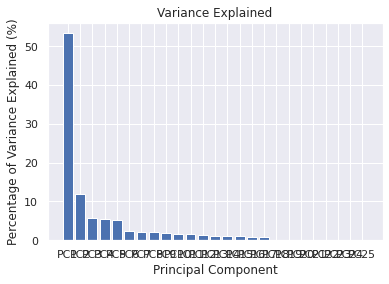

In [ ]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

  - 방안 3. 약 80% 이상의 분산을 설명하는 PC 건수 채택

In [ ]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.85 이상
print('적합한 PC 개수:', d) # 17개 선택 (PC16까지 활용)

적합한 PC 개수: 5


 - Step 3. PCA
  - 방안 1, 방안 2에서 공통적으로 제시한 결과를 기반으로, PC 6까지 사용하여 실습을 진행

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Eigen Vector
pd.DataFrame(pca.components_[:,:6], 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
             index=data.columns)

In [ ]:
# 각 PC를 이루는 변수들의 조합 구성 (25X6): Eigen Vector
pd.DataFrame(pca.components_[:,:9], 
             columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'], 
             index=data1.columns)

PC1           PC2           PC3           PC4  \
setting1  2.238518e-03  4.764829e-03  1.110223e-16  0.000000e+00   
setting2 -5.942829e-03 -1.465222e-02 -2.775558e-17 -0.000000e+00   
setting3  6.698846e-01  7.290705e-01  2.775558e-17  0.000000e+00   
s1        7.241405e-01 -6.021282e-01 -0.000000e+00  2.775558e-17   
s2       -1.613890e-01  3.246483e-01 -2.775558e-17 -2.775558e-17   
s3        1.709496e-02 -4.187114e-03 -0.000000e+00  1.249001e-16   
s4       -4.004543e-03 -1.030406e-02 -6.938894e-17 -2.393918e-16   
s5       -8.607559e-03  4.778814e-03 -1.110223e-16  0.000000e+00   
s6        4.191341e-03  3.986399e-03  1.942890e-16  1.387779e-17   
s7       -1.013176e-02  3.366263e-03  2.775558e-17  1.387779e-16   
s8        1.923763e-03 -5.700502e-03 -1.387779e-17 -1.665335e-16   
s9        5.986556e-03 -3.460541e-03  0.000000e+00  1.526557e-16   
s10       6.452299e-03  2.308752e-03 -5.551115e-17 -2.220446e-16   
s11       1.053387e-02  1.242685e-03  1.110223e-16  2.220446e-16   
s12      -1.483133e-03 -9.695519e-04 -2.289835e-16 -1.318390e-16   
s13      -3.919468e-03 -6.093614e-03 -1.387779e-17  6.938894e-17   
s14       8.713212e-03 -4.450096e-04 -0.000000e+00  2.220446e-16   
s15      -4.898134e-04 -7.480818e-04 -1.613293e-16  2.498002e-16   
s16      -4.455713e-20 -1.482771e-17  3.322384e-02  1.059627e-01   
s17      -4.676546e-18  8.758995e-17  9.024950e-01  4.240285e-01   
s18      -6.453964e-19  4.578209e-17 -1.926483e-01  4.127873e-01   
s19      -1.105744e-18  7.933018e-17 -3.837781e-01  7.991110e-01   
s20       0.000000e+00 -2.391423e-28  1.278911e-16 -2.153629e-16   
s21      -0.000000e+00  3.292721e-28 -7.530913e-17  2.040370e-16   
ttf       0.000000e+00 -4.581391e-29 -5.129536e-17  2.577444e-17   

                   PC5           PC6           PC7           PC8           PC9  
setting1  2.640212e-01  2.515870e-01  2.912471e-01  0.000000e+00  6.000291e-02  
setting2  6.484849e-03  6.505187e-02 -1.602807e-03 -0.000000e+00 -4.998796e-02  
setting3 -3.595418e-03 -1.560037e-02  1.984098e-03  8.326673e-17  1.363074e-01  
s1        1.536215e-02 -2.679927e-03  7.686422e-03 -1.110223e-16 -3.341259e-01  
s2        1.754559e-02  3.199026e-02  1.683867e-02 -1.110223e-16 -9.289658e-01  
s3       -1.323893e-01  9.121310e-01 -2.381321e-02 -5.551115e-17  2.082054e-02  
s4        1.653441e-01 -2.148543e-01  2.060137e-02  5.551115e-17  5.608583e-03  
s5        6.537566e-01 -7.224978e-02  2.624048e-02  1.110223e-16  4.623304e-03  
s6        6.480787e-01  1.698089e-01 -9.720735e-02  9.194034e-17  6.877291e-03  
s7       -7.432399e-02 -4.884782e-02 -1.631509e-02 -2.359224e-16  4.833303e-03  
s8       -9.007370e-02 -5.465249e-02  6.551011e-02 -2.844947e-16 -9.375360e-03  
s9       -1.410210e-01 -1.137144e-01  3.178860e-01  0.000000e+00 -1.720304e-03  
s10      -4.056756e-02 -7.431108e-03  3.592111e-01 -5.551115e-17  2.359962e-03  
s11      -1.303328e-02 -4.032247e-03 -7.214090e-01  3.053113e-16 -1.852180e-03  
s12       3.104553e-02  1.824458e-02  2.993080e-01 -1.821460e-16  3.430102e-03  
s13       2.383334e-02  1.554582e-02  2.285323e-01  1.214306e-16 -4.331481e-03  
s14       2.338662e-02  6.906107e-03  8.205104e-02 -3.330669e-16  4.009685e-03  
s15       2.444330e-03  5.201816e-04  8.902721e-03  1.110223e-16  2.498155e-04  
s16      -9.133074e-17  8.158704e-17  5.335585e-17  9.861674e-01 -1.236082e-16  
s17       1.902562e-16 -1.432387e-16  8.216476e-17 -7.424466e-02 -3.539712e-17  
s18      -3.426037e-17 -6.446786e-17  2.900449e-17 -1.474101e-01 -1.253282e-17  
s19      -7.243330e-17 -7.097600e-17  3.999588e-17 -1.522455e-02 -6.611822e-17  
s20      -6.004762e-27 -3.942045e-27 -3.046106e-26  9.154064e-17 -1.199958e-27  
s21       8.267843e-27  5.427792e-27  4.194159e-26  6.207675e-17  1.652214e-27  
ttf      -1.150419e-27 -7.552471e-28 -5.835840e-27 -1.387794e-16 -2.298987e-28

In [ ]:
X_pp = pd.DataFrame(X_p[:,:6], 
                    columns = ['PC1','PC2','PC3','PC4','PC5','PC6'], 
                    index = data1.index)

X_pp # PCA 이후 만들어진 data (PC1~ PC6로 총 6개 변수로 축소)

PC1       PC2       PC3       PC4       PC5       PC6
0     -3.164144 -0.459253 -1.171670  0.475838 -0.666436  0.879839
1     -2.593495 -0.834470 -0.131344  1.152261 -0.699705  1.075195
2     -3.183505 -0.575705 -0.526387 -2.126262  0.376397  0.565493
3     -3.575241 -0.846787  0.255922  0.134403 -0.337612 -0.263314
4     -2.641796 -0.406532 -1.021939 -0.309210 -0.349719 -0.481755
...         ...       ...       ...       ...       ...       ...
20626  7.017442 -0.990647 -0.952447  0.631091 -0.014433 -0.479105
20627  7.158456 -1.068202 -1.838224  0.627085 -0.121369  0.593954
20628  8.123263 -0.854180  0.035173  0.289766  0.316532 -0.020540
20629  7.880470 -0.896363  0.307730 -0.836691  0.746663  0.671832
20630  7.976553 -1.432129 -2.338072  0.139649  0.047587 -0.240358

[20631 rows x 6 columns]

 - Plot
차원을 축소한 결과를 plot

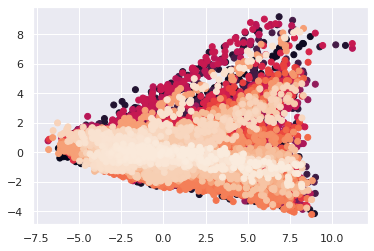

In [ ]:
# Principal Component Pattern Plot 1

plt.scatter(x=X_pp['PC1'],y=X_pp['PC2'], c=X_pp.index)

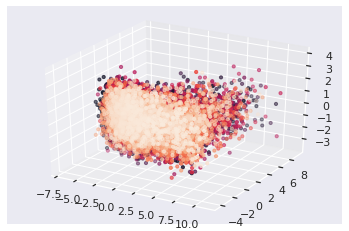

In [ ]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

ax.scatter(X_pp['PC1'],X_pp['PC2'],X_pp['PC3'], s=10, c = X_pp.index)
plt.show()